In [7]:
# Heading 1

No ground truth result available, can be used for testing purposes


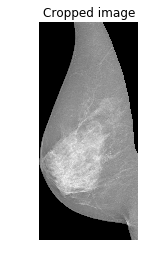

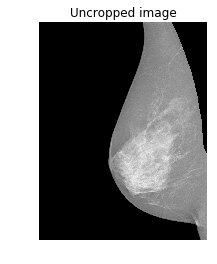

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 107, number of images for testing is 303


In [5]:
import immas
import matplotlib.pyplot as plt
from immas import preprocessing
from immas import MammogramImage
from immas.io import read_dataset

path_image = "../dataset/images/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"

# contructor will automatically read data, if contrary not specified
# pectoral muscle will be removed from image if we have corresponding mask available
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)

# check whether this image has ground truth segmentation result available
if mm.image_ground_truth:
    print('Ground truth available, can be used for training')
else:
    print('No ground truth result available, can be used for testing purposes')

# attribute .image_data contains actual image cropped according to the masks    
plt.imshow(mm.image_data, cmap="gray")
plt.axis('off')
plt.title('Cropped image')
plt.show()

#attribute .image_data contains actual image cropped according to the masks   
plt.imshow(mm.uncropped_image, cmap="gray")
plt.axis('off')
plt.title('Uncropped image')
plt.show()

data_set = read_dataset(image_folder="../dataset/images",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks")

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

In [49]:
# Applies Preprocessing techniques to all elements in the training and the test sets

from immas import preprocessing

img = data_set["train"]
for m in img:
    m.read_data()
    m.image_data = preprocessing.clahe(m.image_data)
    
img = data_set["test"]
for m in img:
    m.read_data()
    m.image_data = preprocessing.clahe(m.image_data)

In [56]:
# Shows the result of applying the preprocessing
img = data_set["train"]
for m in img:
    m.read_data()
    m.image_data = preprocessing.fullPreprocessing(m.image_data)
    plt.imshow(m.image_data, cmap="gray")
    plt.show()
    break

AttributeError: module 'immas.preprocessing' has no attribute 'fullPreprocessing'